In [1]:
import cv2
import numpy as np
import os

In [2]:
color_list = [(255,0,0),
             (255,255,0),
             (255,0,255),
             (255,255,255),
             (0,0,255),
             (0,255,0),
             (128,0,0),
             (128,128,0),
             (128,0,128),
             (128,128,128),
             (0,0,128),
             (0,128,0),
             (64,0,0),
             (64,64,0),
             (64,0,64),
             (64,64,64),
             (0,0,64),
             (0,64,0),
             (32,0,0),
             (32,32,0),
             (32,0,32),
             (32,32,32),
             (0,0,32),
             (0,32,0)
             ]

In [3]:
classes = np.array([
                         'u-turn', 'keep-right', 'keep-left', 'pass-either-side',
                         'compulsory-motor-cycles-track', 'stop', 'no-left-turn', 'no-right-turn', 'no-u-turn',
                         'no-entry', 'weight-limit-sign-5T', 'weight-limit-sign-30T', 'height-limit-sign-2.-m',
                         'height-limit-sign-3.-m', 'height-limit-sign-4.-m', 'height-limit-sign-5.-m', 'height-limit-sign-6.-m',
                         'speed-limit-20', 'speed-limit-30', 'speed-limit-40', 'speed-limit-50', 'speed-limit-60', 'speed-limit-70',
                         'speed-limit-80', 'speed-limit-90','speed-limit-110', 'no-entry-for-vehicles-ex-5T-truntks-etc',
                         'heavy-vehicles-no-driving-on-right-lane', 'no-parking', 'no-stopping', 'give-way', 'wide-limit-3.-m',
                         'no-overtaking', 'road-work', 'camera-operation-zone', 'crosswind-area', 'caution-hump',
                         'hump-ahead', 'towing-zone', 'left-bend', 'slippery-road', 'pedestrain-crossing-opt1', 'pedestrain-crossing-opt2',
                         'school-childern-crossing-opt1', 'school-childern-crossing-opt2', 'caution', 'narrow-roads-on-the-left',
                         'traffic-lights-ahead', 'obstacles', 'staggered-junctions', 'crossroads-T-junction', 'crossroads-to-the-right',
                         'crossroads-to-the-left', 'exit-to-the-left', 'crossroads', 'minor-road-on-right', 'minor-road-on-left',
                         'minor-road-on-left-opt2', 'cattle-crossing', 'roundabout-ahead', 'narrow-bridge','split-way', 'two-way-road',
                         'divided-road-ending', 'curve-on-the-left', 'crossroads-Y-junction'])

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

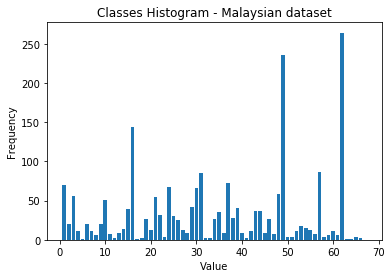

freq->
[ 70  20  56  11   1  20  11   6  20  51   7   2   9  14  39 144   1   2
  26  13  54  32   4  67  30  25  12   9  42  66  85   2   2  27  35   9
  72  28  41   9   2  11  37  37   9  27   8  59 235   3   3  11  18  15
  13   8  87   4   6  11   6 264   1   1   4   2]
Mean: 31.15
Var: 2207.25
Max: 264.00
Min: 1.00
Sum: 2056.00
STD: 46.98
CV: 1.51

Total number of objects: 2056


In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'data/MTSD/Annotations/gt.txt'


file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
# print counts
keep = np.where(frq < 50)
# print keep
# print classes[keep]
# print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
# print frq.mean(), frq.var(), frq.max(), frq.min(), frq.sum(), frq.std()
# print len(tmp)


print 'freq->\n',counts
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print 'Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean())
print 'Total number of objects:',len(tmp)

# Calculating the blur factor NEW

33.jpg
blur factor =  4310.8059 53.21982592592593


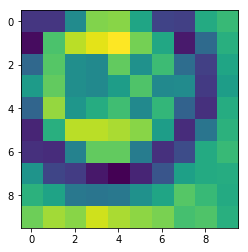

In [165]:
## testing the DCT
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
label_path = './data/test2/labels/'

fname = files[1002] #[1137] #[1002] #[1102]
print(fname)

if fname.split('.')[1] != 'txt':

    im = cv2.imread(os.path.join(im_path, fname))
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


    
    #print(im)
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')

    line = f.readlines()[0]
    spl = line.split(' ')

    x1 = int(spl[1])#+1
    y1 = int(spl[2])#+1
    x2 = int(spl[3])#-1
    y2 = int(spl[4])#-1
    fm = 0
    fm = variance_of_laplacian(gray[y1:y2+1,x1:x2+1])
    print('blur factor = ',fm, (fm/float((y2-y1)*(x2-x1))))
    plt.imshow(gray[y1:y2+1,x1:x2+1])
    plt.show()

    f.close()

## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [5]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test2/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]

for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
    #print fname
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test2/aug/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test2/aug_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [4]:
im_path = './data/test2/aug/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [5]:
mask_path = './data/test2/aug_gt/'
label_path = './data/test2/aug_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [9]:
import Augmentor

In [10]:
p = Augmentor.Pipeline("./data/test2/aug")
p.ground_truth("./data/test2/aug_gt")

Initialised with 523 image(s) found.
Output directory set to ./data/test2/aug/output.523 ground truth image(s) found.


In [11]:
p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
p.skew_tilt(probability=0.5, magnitude=0.2)
p.skew(probability=0.5, magnitude=0.2)

#p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
#p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
#p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
#p.skew_tilt(probability=0.5, magnitude=0.3)
#p.skew(probability=0.5, magnitude=0.3)

In [12]:
#p.remove_operation(operation_index=0)

p.status()

Operations: 5
	0: RotateRange (max_right_rotation=5.0 max_left_rotation=-5.0 probability=0.4 )
	1: Zoom (min_factor=1.05 max_factor=1.1 probability=0.3 )
	2: Distort (randomise_magnitude=True magnitude=5 grid_height=2 probability=0.7 grid_width=2 )
	3: Skew (magnitude=0.2 skew_type=TILT probability=0.5 )
	4: Skew (magnitude=0.2 skew_type=RANDOM probability=0.5 )
Images: 523
Classes: 1
	Class index: 0 Class label: aug 
Dimensions: 20
	Width: 1917 Height: 977
	Width: 1919 Height: 981
	Width: 1920 Height: 981
	Width: 1917 Height: 979
	Width: 1920 Height: 985
	Width: 1919 Height: 979
	Width: 1920 Height: 979
	Width: 3920 Height: 2208
	Width: 1918 Height: 983
	Width: 1917 Height: 981
	Width: 1919 Height: 977
	Width: 1920 Height: 977
	Width: 1915 Height: 981
	Width: 3840 Height: 2160
	Width: 1919 Height: 983
	Width: 1915 Height: 975
	Width: 1917 Height: 983
	Width: 4592 Height: 3448
	Width: 1917 Height: 975
	Width: 1920 Height: 983
Formats: 1
	 JPEG

You can remove operations using the appro

In [13]:
#p.sample(395*10, multi_threaded=True)
p.sample(44*100, multi_threaded=True)

Processing <PIL.Image.Image image mode=RGB size=4592x3448 at 0x7F21306F4250>: 100%|██████████| 4400/4400 [21:53<00:00,  3.35 Samples/s]                   


## 5) Create the annotation for the new augmented images

In [7]:
aug_path = './data/test2/aug/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [8]:
mask_path = './data/test2/aug_gt/'
label_path = './data/test2/aug_labels/'

print gts[0].split('_')[6] in augs[0].split('_')[4]
print gts[0]
print augs[0]
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print y, os.path.isfile(os.path.join(aug_path, y))
print len(augs), len(gts)

print label_path, mask_path

False
_groundtruth_(1)_aug_DSC-0147_aug.jpg_d30032b5-a055-4a31-b3ba-d8509eb4e7b6.jpg
aug_original_P1840285_aug.jpg_d4071152-e841-455d-a1bc-83e26b2cf3f6.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
4400 4400
./data/test2/aug_labels/ ./data/test2/aug_gt/


In [9]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test2/aug/output/'
label_path = './data/test2/aug_labels/'

f_out = open('results2/gt_phase_1.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug_original_', '_groundtruth_(1)_aug_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        # Fix problem of corner small bbox
        #print im.shape, x,y,w+x,h+y, aug
        if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            nw = float(w)/im.shape[1]
            nh = float(h)/im.shape[0]
            ratio = float(max(nw,nh)) / min(nw,nh)
            if ratio >= 2.5:
                print 'skip->',ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num
                continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

skip-> 3.94452808133 0.0285278745645 0.11252900232 aug_original_P1840283_aug.jpg_ead2f4ce-2048-4e38-8f86-3b3f5d2717ec.jpg 0 727 131 388 cls 37
skip-> 6.65893271462 0.000217770034843 0.00145011600928 aug_original_P1840289_aug.jpg_f196fb05-325f-4994-8b89-b698713ca6c6.jpg 0 2108 1 5 cls 46
skip-> 2.52619682354 0.0760017421603 0.191995359629 aug_original_P1860039_aug.jpg_427f304a-cbbe-41df-866c-6ae74944e141.jpg 0 1022 349 662 cls 43
skip-> 3.60762430615 0.0516114982578 0.186194895592 aug_original_P1860039_aug.jpg_697cf51b-85a0-4776-8543-49e30ed7e85a.jpg 0 881 237 642 cls 24
skip-> 6.53209590101 0.00914634146341 0.0597447795824 aug_original_P1840009_aug.jpg_22b95c09-44d6-44fd-928b-7ae4f3b12cef.jpg 4550 762 42 206 cls 38
skip-> 4.96524765459 0.0200348432056 0.0994779582367 aug_original_P1860038_aug.jpg_79fa7819-14ab-4b4c-b84e-3ab53f2e71c0.jpg 0 1355 92 343 cls 33
skip-> 6.81913531963 0.0969076655052 0.014211136891 aug_original_P1840096_aug.jpg_c232dcf8-ac1e-45a0-8740-a73fdc672b88.jpg 2813 0 

skip-> 3.72810116713 0.154616724739 0.0414733178654 aug_original_P1840004_aug.jpg_29dd62e0-652a-4a2b-b7f2-78af93b56621.jpg 247 0 710 143 cls 52
skip-> 5.32714617169 0.000217770034843 0.00116009280742 aug_original_P1840140_aug.jpg_3dad80f4-731f-4120-b118-930a20a6ab40.jpg 0 1194 1 4 cls 37
skip-> 2.63830884249 0.0803571428571 0.212006960557 aug_original_P1840602_aug.jpg_28ebbe30-6db2-410f-b353-bf871cf56af1.jpg 0 545 369 731 cls 18
skip-> 7.73085846868 0.00892857142857 0.0690255220418 aug_original_P1840537_aug.jpg_50e299e4-b808-4c13-a593-5c8bbf07ae9c.jpg 4551 1597 41 238 cls 24
skip-> 3.51830176265 0.0145905923345 0.0513341067285 aug_original_P1840608_aug.jpg_c19bc411-b341-4d8f-aaa5-45b861720285.jpg 0 1812 67 177 cls 28
skip-> 3.30051447594 0.0200348432056 0.0661252900232 aug_original_P1840537_aug.jpg_d4df3d74-2ca9-4652-a6df-6adbec9cbdcc.jpg 4500 1525 92 228 cls 24
skip-> 3.65966136795 0.0527003484321 0.192865429234 aug_original_P1830988_aug.jpg_da261946-8f95-4db0-8ae7-2d43d8cd9533.jpg 0 

## filter all corner bbox

In [10]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mask_gt_path = './data/test2/aug/output/'
label_path = './data/test2/aug_labels/'
f_anno = open('results2/gt_phase_1.txt', 'r')
lines = f_anno.readlines()

outlayer = []
outlayer_index = []

for i, line in enumerate(lines):
        spl = line.split(';')
        fname = spl[0]
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        
        f_fname = os.path.join('./data/test2/aug/',fname)
        img = Image.open(f_fname)
        #img=mpimg.imread(f_fname)
        #if (x1 == 0) or (x2 == img.shape[1]) or (y1 == 0) or (y2 == img.shape[0]):
        if (x1 == 0) or (x2 == img.width) or (y1 == 0) or (y2 == img.height):
            #print(img.height, img.width)
            #print(f_fname, x1,y1,x2,y2)
            outlayer.append( (f_fname, x1,y1,x2,y2) )
            outlayer_index.append(i)
f_anno.close()

In [11]:
print(len(outlayer))

170


In [12]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches

keeping = []
discarding = []

i=0
button_yes = widgets.Button(description="Keep")
button_no = widgets.Button(description="Discard")

print(i+1,'/',len(outlayer))
display.display(button_yes,button_no)
#display.display(button_no)
fig,ax = plt.subplots(1)
ax.imshow(Image.open(outlayer[i][0]))
rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

def on_click_yes(b):
    #print("yes")
    global i
    
    keeping.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1)
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
def on_click_no(b):
    global i
    
    discarding.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1)
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

    
button_yes.on_click(on_click_yes)
button_no.on_click(on_click_no)

Finish


In [13]:
print('keeping:',len(keeping),'/',len(outlayer),'\ndiscarding:', len(discarding),'/', len(outlayer))

keeping: 123 / 170 
discarding: 47 / 170


In [14]:
noutlayer = np.array(outlayer)
noutlayer_index = np.array(outlayer_index)
new_lines = []
mapping_lines = {}
for ii,jj in enumerate(noutlayer_index):
    mapping_lines[jj] = ii
    #print(ii, jj, lines[jj])
for ii, line in enumerate(lines):
    if mapping_lines.has_key(ii):
        if mapping_lines[ii] in discarding:
            continue
    new_lines.append(line)
#print(keeping)
#print(noutlayer[keeping])

In [15]:
print(len(new_lines), len(lines))

6140 6187


In [16]:
!cp ./results2/gt_phase_1.txt ./results2/gt_phase_1.txt.backup

In [17]:
f_out = open('results2/gt_phase_1.txt', 'w')
f_out.writelines(new_lines)
f_out.close()

In [18]:
print(discarding)
print(noutlayer[discarding])

[0, 1, 7, 10, 16, 17, 24, 26, 31, 42, 43, 49, 50, 54, 56, 57, 58, 59, 62, 67, 72, 75, 78, 80, 88, 93, 96, 100, 101, 106, 108, 116, 121, 122, 125, 132, 134, 136, 142, 148, 151, 152, 153, 154, 162, 163, 167]
[['./data/test2/aug/./output/aug_original_P1840222_aug.jpg_1fb146f8-6c5e-4a32-98ae-b07d383c79ac.jpg'
  '0' '1727' '152' '2000']
 ['./data/test2/aug/./output/aug_original_P1860632_aug.jpg_8197ed91-19e6-4cc3-926e-10cd828e67e8.jpg'
  '0' '1409' '129' '1569']
 ['./data/test2/aug/./output/aug_original_P1860038_aug.jpg_a92fc77c-ac35-4ecc-bc55-a28447dddcad.jpg'
  '0' '889' '173' '1202']
 ['./data/test2/aug/./output/aug_original_P1830950_aug.jpg_fecabfde-56bb-4b8c-b578-30ae3127cc8b.jpg'
  '0' '0' '259' '329']
 ['./data/test2/aug/./output/aug_original_P1860632_aug.jpg_1569f217-f89b-41ec-8c01-dbf215b1f5e8.jpg'
  '0' '1281' '133' '1435']
 ['./data/test2/aug/./output/aug_original_135_aug.jpg_268ce520-c0a3-44e1-83ab-c3691ea61064.jpg'
  '0' '218' '84' '321']
 ['./data/test2/aug/./output/aug_origin

## End Phase 1

## Check histogram

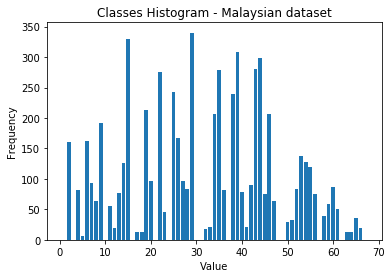

freq->
 [160  81   7 162  93  63 192  55  19  77 126 330  13  13 213  97 276  46
 243 167  97  84 340  18  21 207 279  81 239 309  78  21  90 280 298  75
 207  64  29  33  84 138 127 119  75  39  58  86  50  13  13  36  19]
Mean: 115.85
 Var: 9035.15
 Max: 340.00
 Min: 7.00
 Sum: 6140.00
 STD: 95.05
 CV: 0.82

Total number of objects: 6140


In [19]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_phase_1.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp))

In [20]:
!cat gt.txt > ./results2/gt_phase_1_after_aug.txt
!cat ./results2/gt_phase_1.txt >> ./results2/gt_phase_1_after_aug.txt

## Phase 2

## 1) Calculate the freq of each class and store all the freq < 50 in keep varaibale array

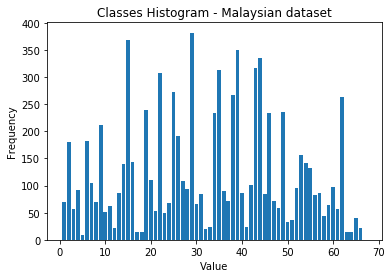

freq->
 [ 70 180  56  92   8 182 104  69 212  51  62  21  86 140 369 144  14  15
 239 110  54 308  50  67 273 192 109  93 382  66  85  20  23 234 314  90
  72 267 350  87  23 101 317 335  84 234  72  59 235  32  36  95 156 142
 132  83  87  43  64  97  56 264  14  14  40  21]
Mean: 124.18
 Var: 10240.12
 Max: 382.00
 Min: 8.00
 Sum: 8196.00
 STD: 101.19
 CV: 0.81

Total number of objects: 8196


In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_phase_1_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp) )

In [23]:
keep = np.where(frq < 50)
print(keep)

(array([ 4, 11, 16, 17, 31, 32, 40, 49, 50, 57, 62, 63, 64, 65]),)


## 2) Loop for each image
### - blur the objects that is not in keep array
### - store only the images that have at least one object in keep array in aug folder
### - store aswell the labels for each image obj in aug folder in aug_labels

In [31]:
im_path = './data/MTSD/Images/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]
#mask_path = './data/test/gt/'
label_path = './data/test2/labels/'

#fname = 'P1840185.JPG'
#fname = 'P1840114.JPG'
#fname = 'P1840116.JPG'
#fname = 'P1860061.JPG'

#keep = [0,2,3,4,5,6,8,9,10,11]
for fname in files:
    if fname.split('.')[1] == 'txt':
        continue
        
    if not os.path.isfile(os.path.join(label_path, fname.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    
    store = False

    im = cv2.imread(os.path.join(im_path, fname))
    org = im.copy()
    f = open(os.path.join(label_path, fname.split('.')[0]+'.txt'), 'r')
    
    lines = f.readlines()
    text = ''
    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i not in keep[0]:
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1

            #print y2-y1, x2-x1

            #cv2.imwrite('without_aug.jpg', im)
            #print im[y1:y2,x1:x2]

            np.random.shuffle(im[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(im[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(im[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(im, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            im[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            #cv2.imwrite('aug_blur.jpg', im)

    for line in lines:
        spl = line.split(' ')
        i = np.where(classes == spl[0])[0][0]
        if i in keep[0]:
            store = True
            
            #spl = line.split(' ')
            x1 = int(spl[1])#+1
            y1 = int(spl[2])#+1
            x2 = int(spl[3])#-1
            y2 = int(spl[4])#-1
            text += line
            #im2 = cv2.imread(os.path.join(im_path, fname))
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            im[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
    
    if store:
        cv2.imwrite(os.path.join('data/test2/aug2/',fname.split('.')[0]+'_aug'+'.jpg'), im)
        f_out = open(os.path.join('./data/test2/aug2_labels/', fname.split('.')[0]+'_aug'+'.txt'), 'w')
        f_out.write(text)
        f_out.close()

## 3) Generate the mask image for each aug image

In [4]:
im_path = './data/test2/aug2/'
files = [f for f in os.listdir(im_path) if os.path.isfile(os.path.join(im_path,f))]

In [5]:
mask_path = './data/test2/aug2_gt/'
label_path = './data/test2/aug2_labels/'

for fil in files:
    if not os.path.isfile(os.path.join(label_path, fil.split('.')[0]+'.txt')):
        #fault = open('faults.txt', 'a')
        #fault.write(fil+'\n')
        continue
    im = cv2.imread(os.path.join(im_path, fil))
    f = open(os.path.join(label_path, fil.split('.')[0]+'.txt'))
    #print os.path.join(label_path, fil.split('.')[0]+'.txt')
    lines = f.readlines()
    im_out = np.zeros(im.shape, np.uint8)
    for i, line in enumerate(lines):
        spl = line.split(' ')
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        #print fil, i, line
        cv2.rectangle(im_out, (x1,y1), (x2,y2),color_list[i], -1)
    #print '______'
    cv2.imwrite(os.path.join(mask_path, fil), im_out)

## 4) Augment the images with ground truth mask

In [6]:
import Augmentor

p = Augmentor.Pipeline("./data/test2/aug2")
p.ground_truth("./data/test2/aug2_gt")

#p.rotate(probability=0.4, max_left_rotation=5, max_right_rotation=5)
#p.zoom(probability=0.3, min_factor=1.05, max_factor=1.1)
#p.random_distortion(probability=0.7, grid_width=2, grid_height=2, magnitude=5)
#p.skew_tilt(probability=0.5, magnitude=0.2)
#p.skew(probability=0.5, magnitude=0.2)

p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=8)
p.skew_tilt(probability=0.5, magnitude=0.3)
p.skew(probability=0.5, magnitude=0.3)

#p.sample(44*100, multi_threaded=True)
p.sample(395*10, multi_threaded=True)

Executing Pipeline:   0%|          | 0/3950 [00:00<?, ? Samples/s]

Initialised with 33 image(s) found.
Output directory set to ./data/test2/aug2/output.33 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=4592x3448 at 0x7F91541B3750>: 100%|██████████| 3950/3950 [24:11<00:00,  2.72 Samples/s]                   


In [24]:
aug_path = './data/test2/aug2/output/'
files = [f for f in os.listdir(aug_path) if os.path.isfile(os.path.join(aug_path,f))]

gts = []
augs = []

for fi in files:
    if 'original' in fi:
        augs.append(fi)
    else:
        gts.append(fi)

In [25]:
print (gts[0].split('_')[6] in augs[0].split('_')[4])
print (gts[0])
print (augs[0])
x = 'aug_original_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg'
y = x.replace('aug_original_', '_groundtruth_(1)_aug_')
print (y, os.path.isfile(os.path.join(aug_path, y)))
print (len(augs), len(gts))

print (label_path, mask_path)

False
_groundtruth_(1)_aug2_72_aug.jpg_0be8c460-9fd6-4a10-90fd-60f58114477a.jpg
aug2_original_72_aug.jpg_f4cabf3a-ba4f-4e2f-9522-ef96dbcac282.jpg
_groundtruth_(1)_aug_49_aug.jpg_45daa9b6-92a4-4fc2-893e-f08ac42f23d1.jpg False
3950 3950
./data/test2/aug_labels/ ./data/test2/aug_gt/


## 5) Create the annotation for the new augmented images

In [30]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
mask_gt_path = './data/test2/aug2/output/'
label_path = './data/test2/aug2_labels/'

f_out = open('results2/gt_phase_2.txt', 'w')
for aug in augs:
    aug_sp = aug.split('_')
    gt = aug.replace('aug2_original_', '_groundtruth_(1)_aug2_')
    org_file =  aug_sp[2]+'_'+aug_sp[3]
    
    
    if not os.path.exists(os.path.join(label_path, org_file.split('.')[0]+'.txt')):
        continue
        
    im = cv2.imread(os.path.join(mask_gt_path,gt))
    f = open(os.path.join(label_path, org_file.split('.')[0]+'.txt'), 'r')
    
    #im[im == 255] = 1
    #im[im == 0] = 255
    #im[im == 1] = 0
    lines = f.readlines()
    #print 'Number of objects', len(lines)
    for i in range(0, len(lines)):
        lower = np.array(color_list[i])-10
        upper = np.array(color_list[i])+10
        mask = cv2.inRange(im, lower, upper)
        im3 = cv2.bitwise_and(im, im, mask=mask)


        #print 'obj#', i
        im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

        #print np.max(im2), np.min(im2)

        #cv2.imwrite(org_file+str(i)+'_thr.jpg', im2)
        ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
        _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print len(contours), org_file
        if len(contours) == 0:
            continue
        #for i in range(0, len(contours)):
            #if(i%2 == 0)

        # getting the maximum width contours
        x,y,w,h = cv2.boundingRect(contours[0])
        for cnt in contours:
            cx, cy, cw, ch = cv2.boundingRect(cnt)
            if cw > w:
                x,y,w,h = cx, cy, cw, ch
        #cnt = contours[i]
        if x == 0 or y == 0 or ((x+w) == im.shape[1]) or ((y+h) == im.shape[0]):
            nw = float(w)/im.shape[1]
            nh = float(h)/im.shape[0]
            ratio = float(max(nw,nh)) / min(nw,nh)
            if ratio >= 2.5:
                print('skip->', ratio,nw, nh, aug, x, y, w, h, 'cls',cls_num)
                continue
        #cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
        cls_num = np.where(classes == lines[i].split(' ')[0])[0][0]
        f_out.write('./output/'+aug+';'+str(x)+';'+str(y)+';'+str(x+w)+';'+str(y+h)+';'+ str(cls_num) +'\n')
        #print (x,y), (x+w, y+h)
        #cv2.imwrite(org_file+str(i)+'.jpg', im)

        #print '_______'
f_out.close()

skip-> 2.54272252138 0.0973432055749 0.038283062645 aug2_original_P1860113_aug.jpg_6438a91b-3d4a-4cf6-b194-31c75ed57733.jpg 1464 0 447 132 cls 4
skip-> 6.32648824968 0.0862369337979 0.0136310904872 aug2_original_P1860113_aug.jpg_8758c011-9c15-49e0-8953-c53139e560ad.jpg 1461 0 396 47 cls 57
skip-> 4.32438924526 0.0370209059233 0.160092807425 aug2_original_P1860056_aug.jpg_7dc512ea-fa5f-48f4-94b3-b3268db41d9a.jpg 4422 1062 170 552 cls 63
skip-> 3.57939514901 0.106925087108 0.0298723897912 aug2_original_P1860113_aug.jpg_46bd3779-6891-4c12-84b0-28073b9f067d.jpg 2190 0 491 103 cls 65
skip-> 3.19866589327 0.0243902439024 0.0780162412993 aug2_original_P1860055_aug.jpg_fc36d595-1fa1-4eda-90dc-fb292f9080d0.jpg 0 1386 112 269 cls 50
skip-> 3.16851585094 0.0459494773519 0.145591647332 aug2_original_P1860056_aug.jpg_fcb8dc33-6a3f-424d-9a56-6e237fba46ee.jpg 4381 1281 211 502 cls 64
skip-> 3.8664770601 0.00675087108014 0.0261020881671 aug2_original_P1860056_aug.jpg_57068861-8243-4ffd-89b3-470fc8735b

skip-> 3.62954701612 0.0507404181185 0.184164733179 aug2_original_P1840560_aug.jpg_1ee552d6-cbb9-438d-8778-99182f41529e.jpg 0 735 233 635 cls 32
skip-> 2.64663469831 0.0775261324042 0.0292923433875 aug2_original_P1860113_aug.jpg_8f6d5e21-1ffb-4d60-9dac-05f7655b3a18.jpg 1339 0 356 101 cls 50
skip-> 8.86045740802 0.0106707317073 0.0945475638051 aug2_original_P1860055_aug.jpg_0548a1a8-58de-4081-bd38-32fe117adf90.jpg 0 1132 49 326 cls 64
skip-> 3.27366524517 0.0389808362369 0.127610208817 aug2_original_P1860056_aug.jpg_59e2576d-236e-460d-a887-947f0da29f4c.jpg 4413 1513 179 440 cls 22
skip-> 2.73793680144 0.0858013937282 0.234918793503 aug2_original_P1860056_aug.jpg_41f7ca51-bd21-4c4b-b156-a49c213165b1.jpg 4198 1199 394 810 cls 50
skip-> 12.430007734 0.0130662020906 0.162412993039 aug2_original_P1860056_aug.jpg_e6748f0a-0c10-45c0-9479-797590c1018d.jpg 4532 1867 60 560 cls 64
skip-> 4.22364982578 0.0391986062718 0.0092807424594 aug2_original_P1860113_aug.jpg_1224a722-f56c-4ea4-8335-881d3f659

## filter all corner bbox

In [31]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

mask_gt_path = './data/test2/aug2/output/'
label_path = './data/test2/aug2_labels/'
f_anno = open('results2/gt_phase_2.txt', 'r')
lines = f_anno.readlines()

outlayer = []
outlayer_index = []

for i, line in enumerate(lines):
        spl = line.split(';')
        fname = spl[0]
        x1 = int(spl[1])#+1
        y1 = int(spl[2])#+1
        x2 = int(spl[3])#-1
        y2 = int(spl[4])#-1
        
        f_fname = os.path.join('./data/test2/aug2/',fname)
        img = Image.open(f_fname)
        #img=mpimg.imread(f_fname)
        #if (x1 == 0) or (x2 == img.shape[1]) or (y1 == 0) or (y2 == img.shape[0]):
        if (x1 == 0) or (x2 == img.width) or (y1 == 0) or (y2 == img.height):
            #print(img.height, img.width)
            #print(f_fname, x1,y1,x2,y2)
            outlayer.append( (f_fname, x1,y1,x2,y2) )
            outlayer_index.append(i)
f_anno.close()

In [32]:
print(len(outlayer))

169


In [33]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual#, Button
import ipywidgets as widgets
from IPython import display

import matplotlib.patches as patches

keeping = []
discarding = []

i=0
button_yes = widgets.Button(description="Keep")
button_no = widgets.Button(description="Discard")

print(i+1,'/',len(outlayer))
display.display(button_yes,button_no)
#display.display(button_no)
fig,ax = plt.subplots(1)
ax.imshow(Image.open(outlayer[i][0]))
rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

def on_click_yes(b):
    #print("yes")
    global i
    
    keeping.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1)
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    
def on_click_no(b):
    global i
    
    discarding.append(i)
    i=i+1
    
    display.clear_output()
    if i>= len(outlayer):
        print("Finish")
        return
    
    
    print(i+1,'/',len(outlayer))
    display.display(button_yes)
    display.display(button_no)
    fig,ax = plt.subplots(1)
    ax.imshow(Image.open(outlayer[i][0]))
    rect = patches.Rectangle((outlayer[i][1],outlayer[i][2]),outlayer[i][3]-outlayer[i][1],outlayer[i][4]-outlayer[i][2],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

    
button_yes.on_click(on_click_yes)
button_no.on_click(on_click_no)

Finish


In [34]:
print('keeping:',len(keeping),'/',len(outlayer),'\ndiscarding:', len(discarding),'/', len(outlayer))

keeping: 94 / 169 
discarding: 75 / 169


In [35]:
noutlayer = np.array(outlayer)
noutlayer_index = np.array(outlayer_index)
new_lines = []
mapping_lines = {}
for ii,jj in enumerate(noutlayer_index):
    mapping_lines[jj] = ii
    #print(ii, jj, lines[jj])
for ii, line in enumerate(lines):
    if mapping_lines.has_key(ii):
        if mapping_lines[ii] in discarding:
            continue
    new_lines.append(line)
#print(keeping)
#print(noutlayer[keeping])

In [36]:
print(len(new_lines), len(lines))

3875 3950


In [37]:
!cp ./results2/gt_phase_2.txt ./results2/gt_phase_2.txt.backup

In [38]:
f_out = open('results2/gt_phase_2.txt', 'w')
f_out.writelines(new_lines)
f_out.close()

In [39]:
print(discarding)
print(noutlayer[discarding])

[2, 6, 7, 9, 10, 11, 18, 23, 31, 32, 34, 35, 36, 41, 43, 44, 45, 50, 51, 53, 54, 57, 59, 62, 63, 64, 67, 69, 70, 72, 77, 78, 79, 84, 85, 87, 88, 89, 93, 97, 103, 105, 106, 107, 109, 111, 114, 117, 118, 119, 121, 122, 125, 129, 130, 134, 135, 137, 140, 141, 142, 144, 145, 146, 149, 152, 154, 156, 158, 160, 162, 163, 164, 166, 168]
[['./data/test2/aug2/./output/aug2_original_P1860056_aug.jpg_99473890-88fa-4c96-bf64-29adc77f4182.jpg'
  '4308' '1102' '4592' '1517']
 ['./data/test2/aug2/./output/aug2_original_P1860113_aug.jpg_490dba08-acdc-4c31-8c87-3ca790b4459c.jpg'
  '1512' '0' '2146' '347']
 ['./data/test2/aug2/./output/aug2_original_P1840387_aug.jpg_db4be081-b920-4eb5-b260-97f0a5d4b6f0.jpg'
  '0' '1105' '247' '1523']
 ['./data/test2/aug2/./output/aug2_original_P1860112_aug.jpg_1d2d66b8-91c4-45c9-8125-338e3cdfd680.jpg'
  '2005' '0' '2312' '261']
 ['./data/test2/aug2/./output/aug2_original_P1860113_aug.jpg_ee9dbda5-c811-4eef-9329-38a2744965c7.jpg'
  '1733' '0' '2289' '242']
 ['./data/test

## Check histogram for phase 2 images

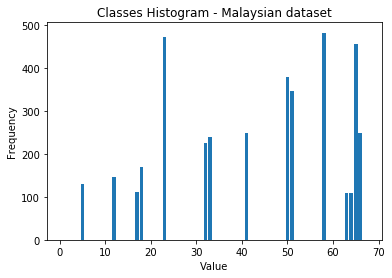

freq->
 [130 146 111 169 473 225 239 249 380 347 483 108 108 457 250]
Mean: 258.33
 Var: 17620.49
 Max: 483.00
 Min: 108.00
 Sum: 3875.00
 STD: 132.74
 CV: 0.51

Total number of objects: 3875


In [40]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_phase_2.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()) )
print ('Total number of objects:',len(tmp))

In [41]:
!cat gt.txt > ./results2/gt_phase_2_after_aug.txt
!cat ./results2/gt_phase_2.txt >> ./results2/gt_phase_2_after_aug.txt

!cat ./results2/gt_phase_1_after_aug.txt > ./results2/gt_phase_1_2_after_aug.txt
!cat ./results2/gt_phase_2.txt >> ./results2/gt_phase_1_2_after_aug.txt

## Check histogram for phase 2 images merged with original images

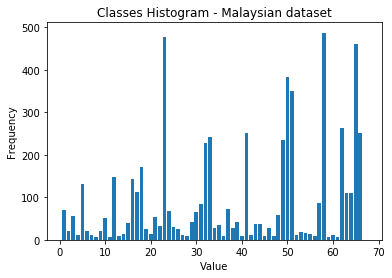

freq->
 [ 70  20  56  11 131  20  11   6  20  51   7 148   9  14  39 144 112 171
  26  13  54  32 477  67  30  25  12   9  42  66  85 227 241  27  35   9
  72  28  41   9 251  11  37  37   9  27   8  59 235 383 350  11  18  15
  13   8  87 487   6  11   6 264 109 109 461 252]
Mean: 89.86
 Var: 14602.81
 Max: 487.00
 Min: 6.00
 Sum: 5931.00
 STD: 120.84
 CV: 1.34

Total number of objects: 5931


In [42]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_phase_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

## Check histogram for phase 2 images merged with phase 1 and the original Image

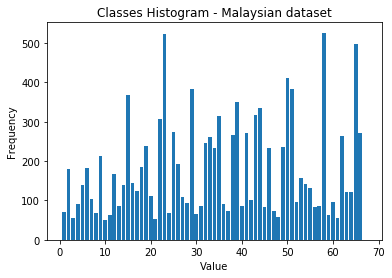

freq->
 [ 70 180  56  92 138 182 104  69 212  51  62 167  86 140 369 144 125 184
 239 110  54 308 523  67 273 192 109  93 382  66  85 245 262 234 314  90
  72 267 350  87 272 101 317 335  84 234  72  59 235 412 383  95 156 142
 132  83  87 526  64  97  56 264 122 122 497 271]
Mean: 182.89
 Var: 15005.55
 Max: 526.00
 Min: 51.00
 Sum: 12071.00
 STD: 122.50
 CV: 0.67

Total number of objects: 12071


In [43]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_phase_1_2_after_aug.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

# Elimination
1- All images are in All_images withound the mask image

2- all the annotation are in gt_phase_1_2_after_aug.txt

what i have to do:

1- Collect the total frequancy for each object

2- Generate for each image a dictienary to all objects in the image

3- from 1 & 2 check loop for each **class out of 66** image check if freq > 50 

    if True:
        loop for all images
            check if we delete the image no other object freq in the image will not be less 50:
                if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
                if no -> then hide the objects that will not be affected then update the annotation as well as the freq array
                

In [57]:
!ln -s /home/dgxadmin/DL/Datasets/MTSD/Images/*.jpg ./data/All_images2/
!ln -s /home/dgxadmin/DL/Datasets/MTSD/Images/*.JPG ./data/All_images2/
!ln -s /home/dgxadmin/DL/mtsd_augmentation/data/test2/aug/output/aug_* ./data/All_images2/
!ln -s /home/dgxadmin/DL/mtsd_augmentation/data/test2/aug2/output/aug2_* ./data/All_images2/

In [45]:
def anno_parse(line):
    spl = line.split(';')
    name = spl[0]
    x1 = spl[1]
    y1 = spl[2]
    x2 = spl[3]
    y2 = spl[4]
    cls = spl[5].strip()
    name = name.replace('./output/','')
    return name, int(x1), int(y1), int(x2), int(y2), int(cls)

In [46]:
import numpy as np
import os
import cv2
import time
#import progressbar

images_path = 'data/All_images2'
gt_path = 'results2/gt_phase_1_2_after_aug.txt'

f = open(gt_path, 'rt')

# 1- Collect the total frequancy for each object
tmp = []
for line in f:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print (frq, len(frq))

# 2- Generate for each image a dictienary to all objects in the image
my_dict = {}
f.seek(0)
lines = f.readlines()
#with progressbar.ProgressBar(maxval=len(lines)) as bar:
for i, line in enumerate(lines):
    name, x1,y1,x2,y2,cls = anno_parse(line)
    if not my_dict.has_key(name):
        my_dict.update({name:[]})

    my_obj = (x1,y1, x2, y2, cls)
    my_dict[name].append(my_obj)

        #bar.update(i)
print ('Done...')

# eliminate the objects with bbox aspect different very high or small
# and in corner
#for img in my_dict:
    #print img[-20::], my_dict[img]
#    for obj in my_dict[img]:
#        x1,y1,x2,y2,_ = obj
#        if x1 == 0:
#            print img
    

f.close()

[ 70 180  56  92 138 182 104  69 212  51  62 167  86 140 369 144 125 184
 239 110  54 308 523  67 273 192 109  93 382  66  85 245 262 234 314  90
  72 267 350  87 272 101 317 335  84 234  72  59 235 412 383  95 156 142
 132  83  87 526  64  97  56 264 122 122 497 271] 66
Done...


In [47]:
from PIL import Image

i = 0
for img in my_dict:
    for obj in my_dict[img]:
        im = Image.open(os.path.join(images_path,img))
        w,h = im.size
        x1,y1,x2,y2,cls = obj
        if x1 == 0 or x2 == w or y1 == 0 or y2 == h:
            i+=1
            print (img, classes[cls], x1,y1,x2,y2)
            
print (i)

aug_original_P1840123_aug.jpg_68fc12b2-9e43-426f-a7c1-27909dceb609.jpg crossroads 0 1559 291 1801
aug_original_P1860639_aug.jpg_17f40b91-cc93-4aca-8b86-c78cd3d7ee3c.jpg keep-right 0 1589 281 1910
aug2_original_P1840560_aug.jpg_1240bfc1-2812-4842-b04c-f6ed7fb5eb2a.jpg wide-limit-3.-m 0 1809 426 2168
aug2_original_P1840560_aug.jpg_697681d1-3ee4-4cb0-bf58-a22124d8ba71.jpg wide-limit-3.-m 0 1535 321 1856
aug_original_P1840009_aug.jpg_11329d7e-951f-4b78-a2bb-9be4ec83f55c.jpg pedestrain-crossing-opt2 4427 760 4592 957
aug2_original_P1840485_aug.jpg_52d2e914-785b-46aa-8c53-04a23fa890e8.jpg minor-road-on-left-opt2 0 1527 416 1895
aug2_original_P1840289_aug.jpg_8646b7c0-1178-4113-94df-1389a2a4df0c.jpg curve-on-the-left 3853 865 4592 1524
aug2_original_P1840560_aug.jpg_0ee5e8ad-3af4-4deb-a23b-0e2024c75ec6.jpg wide-limit-3.-m 0 1583 355 1887
aug_original_P1840470_aug.jpg_dae3a609-b992-4d56-ae20-6c5252f88b8d.jpg no-left-turn 4127 969 4592 1417
aug2_original_P1860113_aug.jpg_ae4f04d0-6899-434b-ac30

aug2_original_P1860113_aug.jpg_dfe6fe9a-33e5-4829-ac62-2f82c6caf33c.jpg speed-limit-20 1875 0 2259 378
aug2_original_P1860056_aug.jpg_ffaec75a-2707-45d8-a6d6-731849d4a7d9.jpg weight-limit-sign-30T 4267 1523 4592 1951
aug_original_P1840008_aug.jpg_de1a894c-ce73-4ca2-91e4-d679bba38bfc.jpg towing-zone 4382 1615 4592 1867
aug_original_P1840246_aug.jpg_a5b30645-b3b0-4e97-85be-ffd68d0e48ef.jpg pedestrain-crossing-opt2 0 1131 323 1609
aug_original_P1840246_aug.jpg_b16f6015-8e9f-4d0f-a33f-996ab42bf815.jpg pedestrain-crossing-opt2 0 1331 363 1657
aug_original_P1840022_aug.jpg_5d4331aa-d997-4c92-9c6b-3c6ba686517d.jpg pedestrain-crossing-opt2 413 0 1253 707
aug_original_P1840002_aug.jpg_9802fc64-ca4b-4b65-a23a-fb25356c743a.jpg no-left-turn 0 1513 190 1798
aug_original_P1860338_aug.jpg_265dd324-feef-4d88-8d22-1767d9d2ca47.jpg no-parking 0 395 268 743
aug_original_P1840002_aug.jpg_bff55a4a-7caf-4f2a-acf4-1d72dd4acff7.jpg no-left-turn 0 1537 212 1792
aug2_original_P1840485_aug.jpg_e71d948d-5fc9-4a04

aug_original_P1840246_aug.jpg_4e684117-d475-4015-a283-87ead8c688b8.jpg pedestrain-crossing-opt2 0 1229 269 1548
aug_original_P1840560_aug.jpg_49e9f7c7-e04a-4e1d-82ac-cfcbd99044e9.jpg wide-limit-3.-m 0 1357 333 1631
aug2_original_P1840560_aug.jpg_bdc25ce7-b0e0-4e81-a8d3-e715ae0a329c.jpg wide-limit-3.-m 0 899 324 1202
aug2_original_P1840485_aug.jpg_7a076633-9bb8-4078-80da-4562e3000790.jpg minor-road-on-left-opt2 0 1337 343 1823
aug2_original_P1860113_aug.jpg_661a0e54-eb1c-4306-93bf-364c60d181de.jpg speed-limit-20 1313 0 1611 318
aug_original_P1840289_aug.jpg_909db2df-2787-4efd-b3f6-2aff707886a1.jpg towing-zone 0 1914 101 2069
aug_original_P1860055_aug.jpg_3f41fa9a-1406-4ecc-83ec-7c270c05140b.jpg weight-limit-sign-30T 0 1235 151 1411
aug_original_P1860113_aug.jpg_c5423a6b-426b-4a67-9474-26091d7df4b4.jpg speed-limit-20 1633 0 1977 361
aug_original_P1840065_aug.jpg_57f2bc55-4a90-4efd-9e8f-b1124df285ba.jpg speed-limit-90 4237 1395 4592 1775
aug2_original_P1860056_aug.jpg_ba01e13c-ad1b-4c68-8

3- from 1 & 2 check loop for each class out of 66 image check if freq > 50

if True:

    loop for all images
    
        check if we delete the image no other object freq in the image will not be less 50:
        
            if yes -> delete the whole image and its annotation from the groundtruth then update the freq array
            
            if no -> then hide the objects that will not be affected then update the annotation as well as the freq array


In [140]:
images_path = 'data/All_images'
del_image_path = 'del_image.txt'
del_object_path = 'del_object.txt'

del_image = open(del_image_path, 'wt')
del_object = open(del_object_path, 'wt')

imgs_del = [] # loop to delete all img from my_dict

for img in my_dict:
    im_del = True
    objs_del = []
    objs_not_del = []
    # check delete the image or not
    for i, obj in enumerate(my_dict[img]):
        _,_,_,_,cls = obj
        if frq[cls] <= 50:
            im_del = False
            objs_not_del.append(obj)
        else:
            frq[cls] -= 1 # correct here because we may have two objects from the same class and in case of im_del all
                            # of the object freq will be subtracted by 1 
            objs_del.append(obj)
            
    if im_del == True:
        #print img
        del_image.write(img+' '+str(objs_del)+'\n\r')
        os.remove(os.path.join(images_path, img))
        #del my_dict[img] #####->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>. del will affect the loop
        imgs_del.append(img) # TO NOT EFFECT THE LOOP I WILL DELETE THEM FROM my_dict AFTER THE LOOP
    else:
        #if len(objs_del) == 0: # comment this if i want to remove all the link files and copy the image
        #    continue           # -------------------- it will take time ------------------------------
        tmp = cv2.imread(os.path.join(images_path,img))
        org = tmp.copy()
        os.remove(os.path.join(images_path, img))
        
        for obj in objs_del:
            x1,y1,x2,y2,cls = obj
            #if frq[cls] > 50:
                #frq[cls] -= 1 # wrong because we may have two objects from the same class
            #del my_dict[img][i] # wrong because it will change the index after delete
            del_object.write(img+' '+str(obj)+' '+classes[cls] + '\n\r')

            ### bluer the object x1,y1,x2,y2
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,0].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,1].T)

            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2])
            np.random.shuffle(tmp[y1:y2+1,x1:x2+1,2].T)

            #np.random.shuffle(im[y1:y2,x1:x2])
            #np.random.shuffle(im[y1:y2,x1:x2].T)

            blur = cv2.blur(tmp, (50, 50))

            #print lines[0] , x1, x2, y1, y2

            #print im[y1:y2,x1:x2,0]
            #cv2.imwrite('aug.jpg', im)

            num =10
            tmp[y1-num:y2+num,x1-num:x2+num] = blur[y1-num:y2+num,x1-num:x2+num]
            ###
            
        for obj in objs_not_del:
            x1,y1,x2,y2,cls = obj
            ynum = int(y2-y1)/14
            xnum = int(x2-x1)/14
            tmp[y1-ynum:y2+ynum,x1-xnum:x2+xnum] = org[y1-ynum:y2+ynum,x1-xnum:x2+xnum]
        
        my_dict[img] = objs_not_del # to keep only the objects that is not deleted
                                
        cv2.imwrite(os.path.join(images_path,img), tmp)
                
for img in imgs_del:
    del my_dict[img]
    
del_image.close()
del_object.close()
print ('done ....')

done ....


Generate the new annotation from the my_dict final

In [54]:
len(my_dict)

9084

don't forget to check P1840369.jpg images anno

ln -s ../MTSD/Images/*.jpg ./

ln -s ../MTSD/Images/*.JPG ./

ln -s ../test/aug/output/aug_*.jpg ./

ln -s ../test/aug2/output/aug2_*.jpg ./

Before the run

All_images have 9350 images link 13.8GB

with 159 link not used in the folder

After run 2545 image 5.0GB without the 159 link 


In [49]:
final_anno_path = 'results2/gt_final.txt'
final_anno = open(final_anno_path, 'wt')

for img in my_dict:
    for obj in my_dict[img]:
        x1,y1,x2,y2,cls = obj
        final_anno.write('{};{};{};{};{};{}\n'.format(img,x1,y1,x2,y2,cls))

final_anno.close()

In [50]:
print (frq, len(frq), np.sum(frq))

[ 70 180  56  92 138 182 104  69 212  51  62 167  86 140 369 144 125 184
 239 110  54 308 523  67 273 192 109  93 382  66  85 245 262 234 314  90
  72 267 350  87 272 101 317 335  84 234  72  59 235 412 383  95 156 142
 132  83  87 526  64  97  56 264 122 122 497 271] 66 12071


In [51]:
final_anno_path = 'results2/gt_final.txt'
final_anno = open(final_anno_path, 'rt')

# 1- Collect the total frequancy for each object
final_tmp = []
for line in final_anno:
    final_tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
    
final_a = np.array(final_tmp)
final_unique, final_counts = np.unique(final_a, return_counts=True)

final_frq = np.array(final_counts)
print (final_frq, len(final_frq), np.sum(final_frq))

final_anno.close()
print ('Done...')

[ 70 180  56  92 138 182 104  69 212  51  62 167  86 140 369 144 125 184
 239 110  54 308 523  67 273 192 109  93 382  66  85 245 262 234 314  90
  72 267 350  87 272 101 317 335  84 234  72  59 235 412 383  95 156 142
 132  83  87 526  64  97  56 264 122 122 497 271] 66 12071
Done...


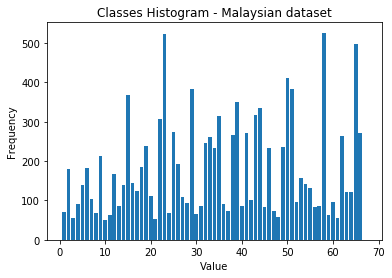

freq->
 [ 70 180  56  92 138 182 104  69 212  51  62 167  86 140 369 144 125 184
 239 110  54 308 523  67 273 192 109  93 382  66  85 245 262 234 314  90
  72 267 350  87 272 101 317 335  84 234  72  59 235 412 383  95 156 142
 132  83  87 526  64  97  56 264 122 122 497 271]
Mean: 182.89
 Var: 15005.55
 Max: 526.00
 Min: 51.00
 Sum: 12071.00
 STD: 122.50
 CV: 0.67

Total number of objects: 12071


In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

file_p = 'results2/gt_final.txt'

#file_p = '/home/hossam/PycharmProjects/tsr-py-faster-rcnn/data/GTSDB/Annotations/gt.txt'

file = open(file_p,'rt')


tmp = []
for line in file:
    tmp.append( int(line.split(';')[5].replace('\r\n',''))+1)
#plt.hist(x, normed=True, bins=30)
# hist, bins = np.histogram(tmp, bins=66)
# width = 0.7 * (bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2
# plt.bar(center, hist, align='center', width=width)
# plt.legend()
# plt.show()

plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,69,1), align='left')
###plt.hist(tmp,histtype='bar', rwidth=0.8,bins=range(1,50,1), align='left')
plt.title("Classes Histogram - Malaysian dataset")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

#print tmp
file.close()
a = np.array(tmp)
unique, counts = np.unique(a, return_counts=True)

frq = np.array(counts)
print ('freq->\n',counts)
#print keep
#print classes[keep]
#print a.mean(), a.var(), a.max(), a.min(), a.sum(), a.std()
print ('Mean: {:.2f}\n'.format(frq.mean()),\
    'Var: {:.2f}\n'.format(frq.var()),\
    'Max: {:.2f}\n'.format(frq.max()),\
    'Min: {:.2f}\n'.format(frq.min()),\
    'Sum: {:.2f}\n'.format(frq.sum()),\
    'STD: {:.2f}\n'.format(frq.std()),\
    'CV: {:.2f}\n'.format(frq.std()/frq.mean()))
print ('Total number of objects:',len(tmp))

# End of Elimination

# For Testing

In [111]:
#x = cv2.imread('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#os.remove('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg')

#cv2.imwrite('/home/mjiit/Hossam/mtsd_augmentation/data/testing/short/1_aug.jpg', x)

dicte = {'1':[(5,6), (7,8)], '7':[(9,9)], '9':[(0,0)]}
print dicte

del_dicte = []

for did in dicte:
    if did == '7':
        del_dicte.append(did)

for kk in del_dicte:
    del dicte[kk]
print dicte

test = [(1,2), (3,4), (5,7)]

print '__', dicte
dicte['9'] = test
test = [(1,3),(9,0)]
print '---', dicte

{'1': [(5, 6), (7, 8)], '9': [(0, 0)], '7': [(9, 9)]}
{'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
__ {'1': [(5, 6), (7, 8)], '9': [(0, 0)]}
--- {'1': [(5, 6), (7, 8)], '9': [(1, 2), (3, 4), (5, 7)]}


In [58]:
my_dict.items()[2]

('aug2_original_P1840287_aug.jpg_3e368841-d808-4b58-afc5-37ff6baac7d9.jpg',
 [(2756, 1112, 2965, 1309, 64)])

In [59]:
print my_dict.items()[3]

('aug2_original_P1840387_aug.jpg_e0744d93-8e90-4234-8e61-4f5d6c9b1cbf.jpg', [(1055, 1248, 1412, 1569, 22)])


In [385]:
print classes[16]

height-limit-sign-6.-m


In [148]:
# mask with different colors space per each object sequential

#./data/test/gt/P1840014.JPG
#./data/test/gt/P1840114.JPG
# P1860079.JPG

#ff = '130.jpg'
ff = 'P1840185.JPG'
im = cv2.imread(os.path.join(mask_path,ff))
f = open(os.path.join(label_path, ff.split('.')[0]+'.txt'), 'r')
#im[im == 255] = 1
#im[im == 0] = 255
#im[im == 1] = 0
lines = f.readlines()
print 'Number of objects', len(lines)
for i in range(0, len(lines)):
    lower = np.array(color_list[i])-10
    upper = np.array(color_list[i])+10
    mask = cv2.inRange(im, lower, upper)
    im3 = cv2.bitwise_and(im, im, mask=mask)


    print 'obj#', i
    im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

    print np.max(im2), np.min(im2)

    cv2.imwrite('test'+str(i)+'.jpg', im2)
    ret, thresh = cv2.threshold(im2, 0, np.max(im2)+1 ,cv2.THRESH_BINARY)
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)
    #for i in range(0, len(contours)):
        #if(i%2 == 0)
    
    # getting the maximum width contours
    x,y,w,h = cv2.boundingRect(contours[0])
    for cnt in contours:
        cx, cy, cw, ch = cv2.boundingRect(cnt)
        if cw > w:
            x,y,w,h = cx, cy, cw, ch
    #cnt = contours[i]
    
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,240,180), 5)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)
    
    print '_______'

Number of objects 7
obj# 0
32 0
1
(240, 1832) (786, 2371)
_______
obj# 1
179 0
4
(255, 1207) (791, 1744)
_______
obj# 2
106 0
9
(640, 89) (814, 260)
_______
obj# 3
255 0
5
(1776, 1737) (1851, 1812)
_______
obj# 4
79 0
16
(2840, 1731) (2877, 1768)
_______
obj# 5
150 0
6
(1831, 1743) (1896, 1829)
_______
obj# 6
17 0
13
(1811, 1609) (1896, 1689)
_______


In [40]:
im = cv2.imread('./data/test/images/P1840121.JPG')
f = open('./data/labels/P1840121.txt')
lines = f.readlines()

im_out = np.zeros(im.shape, np.uint8)

for line in lines:
    spl = line.split(' ')
    x1 = int(spl[1])+1
    y1 = int(spl[2])+1
    x2 = int(spl[3])-1
    y2 = int(spl[4])-1
    
    cv2.rectangle(im_out, (x1,y1), (x2,y2),(255,255,255), -1)
    
cv2.imwrite('test.jpg', im_out)   

True

In [123]:
im = cv2.imread('./data/test/gt/P1840217.JPG')
im2 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im2, 8, 8 ,8)
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 2)
    print (x,y), (x+w, y+h)
    cv2.imwrite(str(i)+'.jpg', im)

(2644, 1198) (2805, 1366)
(2800, 1360) (2804, 1365)
(2654, 1360) (2801, 1365)
(2650, 1360) (2654, 1364)
(2645, 1360) (2649, 1365)
(2650, 1199) (2653, 1361)
(2646, 1199) (2649, 1361)
